#questions

#Define the problem
The problem we aim to solve is determining the appropriate listing price for a new Airbnb listing, which is a common challenge for hosts. To accomplish this, we will use the listing's characteristics and images to predict its price. Our objective is to provide hosts with a reliable and accurate estimate of their listing's value, making it easier for them to set a competitive price and attract potential guests.

#What is the input?
The input data for our problem consists of images and descriptions for various types of buildings, including houses, apartments, and others.


#What is the output?
Our model's output is twofold - it predicts both the type of the building (e.g. house, apartment) and its corresponding price. This prediction is based on the input image and summary provided


#What data mining function is required?
classification problem


#What is an ideal solution?
Our ultimate objective for this problem is to develop a model that can accurately predict both the type and price of any new Airbnb listing, with optimal accuracy. While achieving perfect prediction accuracy

according to my trials the first was the best model


#What could be the challenges?
the biggest challenge is how to deal with imges and text at the same time


#Is fully-connected model a good one for sequential data? Why? How about for image data? Is it good? Why?

A fully-connected model is generally not a good choice for sequential data, such as time series or natural language data, because it does not take into account the sequential nature of the data. Instead, recurrent neural networks (RNNs) and their variants, such as LSTM and GRU networks, are commonly used for sequential data as they are designed to capture the temporal dependencies and patterns in the data.

On the other hand, fully-connected models can be effective for image data, but are generally not the best choice. Convolutional neural networks (CNNs) are specifically designed for image data and are widely used for image classification, object detection, and other computer vision tasks. CNNs are effective because they can identify and extract important features from the images, while fully-connected models treat each pixel independently without taking into account the spatial relationships between them.


#What is gradient vanishing and gradient explosion, and how GRU/LSTM tries to mitigate this problem?
Gradient vanishing and gradient explosion are two problems that can occur during the training of deep neural networks. Gradient vanishing occurs when the gradients that are propagated back through the network during training become very small, making it difficult for the network to learn long-term dependencies. Gradient explosion occurs when the gradients become very large, causing the network to diverge during training.

GRU (Gated Recurrent Unit) and LSTM (Long Short-Term Memory) accomplish this by incorporating gating mechanisms that allow the network to selectively retain or discard information from previous time steps

In the case of LSTM networks, the gating mechanism consists of three gates: the input gate, the forget gate, and the output gate. These gates allow the network to selectively remember or forget information from previous time steps, which helps to prevent the gradients from becoming too small and allows the network to learn long-term dependencies.


Similarly, GRU networks use two gates: the update gate and the reset gate. These gates allow the network to selectively update the hidden state based on the new input and the previous hidden state.


#What is multi-objective/multi-task learning? What is multi-modality learning? How do you use them in this assignment?
Multi-objective/multi-task learning refers to the use of a single model to solve multiple related tasks simultaneously. Instead of training separate models for each task

Multi-modality learning refers to the use of multiple types of data, such as images and text, to train a single model. By combining information from multiple modalities, the model can capture more complex relationships and patterns in the data, leading to improved performance on the task at hand.

objective/multi-task learning could be used to predict both the type and price of the listing, rather than training separate models for each task. By sharing parameters between the two tasks.


#What is the difference among xgboost, lightgbm and catboost?
XGBoost, LightGBM, and CatBoost are all gradient boosting frameworks that are used for supervised learning tasks such as classification and regression.

The main differences between them are:

1-XGBoost is designed to be highly scalable and can handle large, complex datasets. It uses a decision tree-based approach and a regularized learning objective.

2-LightGBM is highly efficient and can handle large-scale datasets with high-dimensional features. It uses a histogram-based approach to binning continuous features and has a fast training process.

3-CatBoost is designed to handle categorical features more effectively than other gradient boosting frameworks. It uses a combination of decision trees and gradient boosting, and has built-in handling for missing values.


#preprocessing and visualization

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm


#libraries related to text processing
!pip install langdetect
!pip install deep_translator
from deep_translator import GoogleTranslator
import nltk
import string
import re
from nltk.tokenize import word_tokenize
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import TfidfVectorizer

##libraries related to models and layers
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPool2D, Dropout, MaxPooling2D
from tensorflow.keras.applications import VGG19
from tensorflow.keras.optimizers import Adam



In [ ]:
#download punkt pakages from nltk library
nltk.download('punkt')
#download stopwords pakages from nltk library
nltk.download('stopwords')
#download wordnet pakages from nltk library
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
#read train data 
df_train= pd.read_csv('/kaggle/input/copy-of-cisc-873-dm-w23-a4/a4/train_xy.csv')
df_train.head()

,summary,image,type,price
0,"Spacious, sunny and cozy modern apartment in t...",img_train/0.jpg,Apartment,1
1,Located in one of the most vibrant and accessi...,img_train/1.jpg,Apartment,0
2,Logement coquet et douillet à 10 minutes du ce...,img_train/2.jpg,Apartment,1
3,"Beautiful and spacious (1076 sc ft, / 100 mc) ...",img_train/3.jpg,Apartment,1
4,Très grand appartement ''rustique'' et très ag...,img_train/4.jpg,Apartment,0


In [ ]:
#display the shape of training and data
print("train shape: ", df_train.shape)

train shape:  (7627, 4)


In [ ]:
# some simple transformation (always make a copy before assigning)
df2_train = df_train.copy()

In [ ]:
#print number of nulls in each columns 
print(df_train.isna().sum().sort_values())

image        0
type         0
price        0
summary    301
dtype: int64


In [ ]:
#drop rows which have null values 
df_train = df_train.dropna()
df_train.shape

(7326, 4)

In [ ]:
#check duplicated data but not found any duplication
df_train.duplicated().any()

False

In [ ]:
# information about data 
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7326 entries, 0 to 7626
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   summary  7326 non-null   object
 1   image    7326 non-null   object
 2   type     7326 non-null   object
 3   price    7326 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 286.2+ KB


In [ ]:
#count values of our label (type)
df_train['type'].value_counts()

Apartment                 5557
Condominium                659
House                      380
Loft                       307
Townhouse                  164
Serviced apartment          73
Guest suite                 32
Bed and breakfast           31
Hostel                      26
Bungalow                    23
Guesthouse                  14
Cottage                     12
Aparthotel                  12
Boutique hotel              10
Other                        8
Villa                        5
Tiny house                   3
Boat                         2
Cabin                        2
Camper/RV                    2
Casa particular (Cuba)       1
Hotel                        1
Earth house                  1
Castle                       1
Name: type, dtype: int64

In [ ]:
#count values of our label (price)
df_train['price'].value_counts()

0    4546
1    2312
2     468
Name: price, dtype: int64

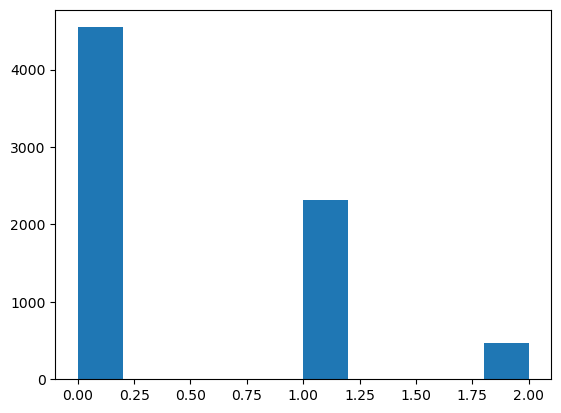

In [ ]:
#show lobel price
plt.hist(df_train['price'])
plt.show()

In [ ]:
#create function to load image from source ,resize and convert it to same size and color 
import os 
from PIL import Image
def load_image(file):
    try:
        image = Image.open(file).convert('LA').resize((64, 64))#Represents L with Alpha transparency channel#resize((64, 64))
        arr = np.array(image)
    except:
        arr = np.zeros((64, 64,2))
    return arr

In [ ]:
# loading train images:
df_train_image=np.array([load_image('/kaggle/input/copy-of-cisc-873-dm-w23-a4/a4/'+str(i)) for i in tqdm(df_train["image"])])

# loading summary: (force convert some of the non-string cell to string)
df_train_text = df_train['summary'].astype('str')

  0%|          | 0/7326 [00:00<?, ?it/s]

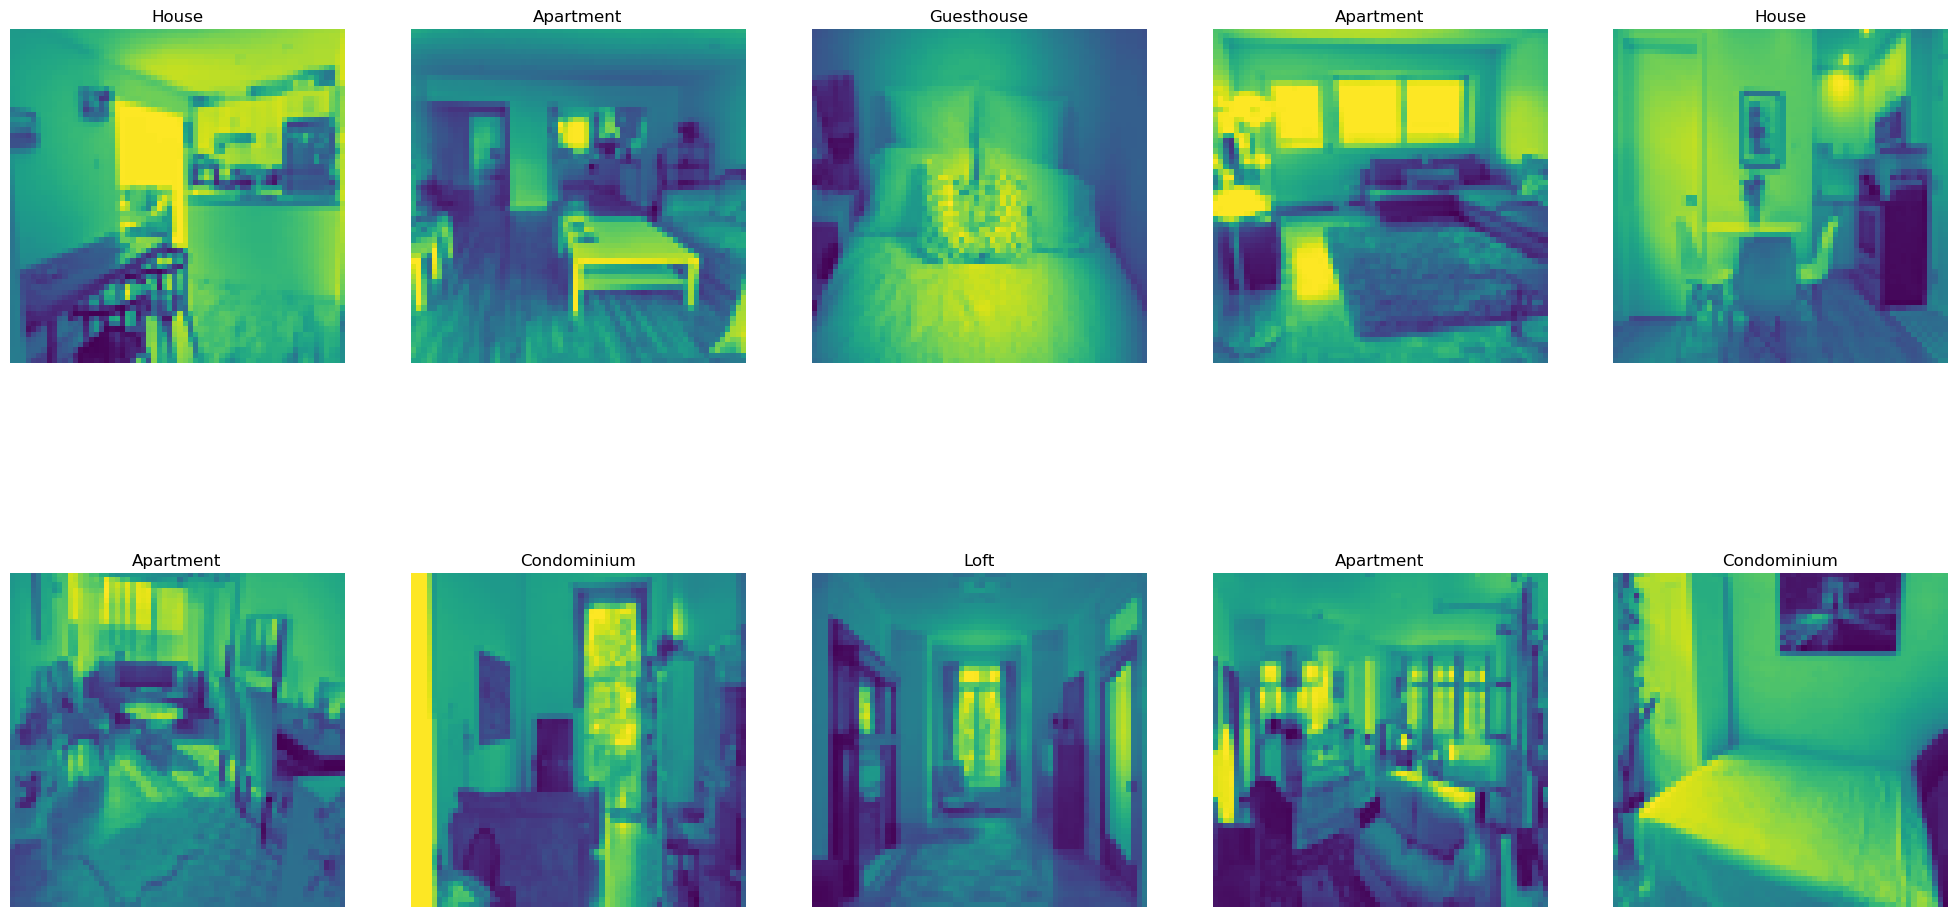

In [ ]:
# checking load_image function and display some of the train images and their types
plt.figure(figsize=(25,20))
for n , i in enumerate(list(np.random.randint(0,len(df_train_image),10))) : 
    plt.subplot(3,5,n+1)
    plt.imshow(df_train_image[i, :, :,0])   
    plt.axis('off')
    plt.title((df_train['type'][i]))

In [ ]:
#encode the the labels(price and type)
df_train['type'] = df_train['type'].astype('category').cat.codes
df_train['price'] = df_train['price'].astype('category').cat.codes
len_type = len(df_train['type'].unique())
len_price = len(df_train.price.unique())

# assign label price 
y_train_price = df_train['price']

# assign label type
y_train_type = df_train['type']

In [ ]:
# show the dataframe after encoding the type and the price
df_train.head()

,summary,image,type,price
0,"Spacious, sunny and cozy modern apartment in t...",img_train/0.jpg,1,1
1,Located in one of the most vibrant and accessi...,img_train/1.jpg,1,0
2,Logement coquet et douillet à 10 minutes du ce...,img_train/2.jpg,1,1
3,"Beautiful and spacious (1076 sc ft, / 100 mc) ...",img_train/3.jpg,1,1
4,Très grand appartement ''rustique'' et très ag...,img_train/4.jpg,1,0


In [ ]:
#it is obvious that summary column has other languages than english 
df_train_text

0       Spacious, sunny and cozy modern apartment in t...
1       Located in one of the most vibrant and accessi...
2       Logement coquet et douillet à 10 minutes du ce...
3       Beautiful and spacious (1076 sc ft, / 100 mc) ...
4       Très grand appartement ''rustique'' et très ag...
                              ...                        
7622    Un grand logement 4 et 1/2, tout inclut, bien ...
7623    Magnificent condo directly on the river. You w...
7624    This apartment is perfect for anyone visiting ...
7625    It is a cozy ,clean ,and comfortable apartment...
7626    Modern country style (newly-renovated); open c...
Name: summary, Length: 7326, dtype: object

In [ ]:
from textblob import TextBlob
from langdetect import detect

#define a function to translate the text
def translate(line):
    try:
        from_lang = detect(line)
        if from_lang != 'en':
            sentence = TextBlob(line).translate(from_lang=from_lang, to='en')
            return sentence
        else:
            return line
    except:
        return line

df_train['summary'] = df_train['summary'].astype('str')

#apply translate function on the text of the train
df_train_text = df_train['summary'].apply(translate)

In [ ]:
#print summary column after translation from other languages into english
df_train_text

0       Spacious, sunny and cozy modern apartment in t...
1       Located in one of the most vibrant and accessi...
2       (C, o, q, u, e, t,  , a, n, d,  , c, o, z, y, ...
3       Beautiful and spacious (1076 sc ft, / 100 mc) ...
4       (V, e, r, y,  , l, a, r, g, e,  , ', ',  , r, ...
                              ...                        
7622    (A,  , l, a, r, g, e,  , a, c, c, o, m, m, o, ...
7623    Magnificent condo directly on the river. You w...
7624    This apartment is perfect for anyone visiting ...
7625    It is a cozy ,clean ,and comfortable apartment...
7626    Modern country style (newly-renovated); open c...
Name: summary, Length: 7326, dtype: object

In [ ]:
# call stemmer and stop wrods
stemmer = SnowballStemmer(language='english')
stop_words = set(stopwords.words("english"))

In [ ]:
#define a function to clean the tex
def text_clean(text,for_embedding=True):#I will apply embedding 
    RE_WSPACE = re.compile(r"\s+", re.IGNORECASE)
    RE_TAGS = re.compile(r"<[^>]+>")
    RE_ASCII = re.compile(r"[^A-Za-zÀ-ž ]", re.IGNORECASE)
    RE_SINGLECHAR = re.compile(r"\b[A-Za-zÀ-ž]\b", re.IGNORECASE)    
    text = text.lower()
    if for_embedding:
        # Keep punctuation
        RE_ASCII = re.compile(r"[^A-Za-zÀ-ž,.!? ]", re.IGNORECASE)
        RE_SINGLECHAR = re.compile(r"\b[A-Za-zÀ-ž,.!?]\b", re.IGNORECASE)

    text = re.sub(RE_TAGS, " ", text)
    text = re.sub(RE_ASCII, " ", text)
    text = re.sub(RE_SINGLECHAR, " ", text)
    text = re.sub(RE_WSPACE, " ", text)

    word_tokens = word_tokenize(text)
    words_tokens_lower = [word.lower() for word in word_tokens]

    if for_embedding:
        # no stemming, lowering and punctuation / stop words removal
        words_filtered = word_tokens
    else:#apply stemmer
        words_filtered = [
            stemmer.stem(word) for word in words_tokens_lower if word not in stop_words
        ]

    text_clean = " ".join(words_filtered)
    return text_clean

In [ ]:
#apply clean function on text of the train
df_train_text = df_train_text.astype('str').apply(text_clean)

In [ ]:
#show data after cleaning
df_train_text

0       spacious , sunny and cozy modern apartment in ...
1       located in one of the most vibrant and accessi...
2       coquet and cozy accommodation minutes from dow...
3       beautiful and spacious sc ft , mc condo on the...
4       very large rustic and very pleasant apartment ...
                              ...                        
7622    large accommodation and , everything includes ...
7623    magnificent condo directly on the river . you ...
7624    this apartment is perfect for anyone visiting ...
7625    it is cozy , clean , and comfortable apartment...
7626    modern country style newly renovated open conc...
Name: summary, Length: 7326, dtype: object

In [ ]:
# preprocess text data

vocab_size = 600000
max_len = 100

# build vocabulary from training set
tokenizer = Tokenizer(num_words=vocab_size)
print(tokenizer )
tokenizer.fit_on_texts(df_train_text)


def _preprocess(list_of_text):
    return pad_sequences(
        #Transforms each text in texts to a sequence of integers.
        tokenizer.texts_to_sequences(list_of_text),
        maxlen=max_len,
        padding='post', #using padding in the end of the vector 
    )

# padding is done inside: 
df_train_text_id = _preprocess(df_train_text)

print(df_train_text_id.shape)

(7326, 100)


In [ ]:
# we can use the tokenizer to convert IDs to words.
print(tokenizer.sequences_to_texts(df_train_text_id[:2]))

['spacious sunny and cozy modern apartment in the heart of montreal this bedroom centrally located in the very popular plateau mont royal neighborhood in the middle of prince arthur pedestrian only street close to all amenities restaurants coffee house bars clubs shopping universities subway stations experience montreal like real local resident be in the heart of the action grand prix week grill saint laurent festival mural and so much more', 'located in one of the most vibrant and accessible locations of downtown montreal this one bedroom condo will not only impress you but leave you with one of the most memorable experiences it is walking distance of the popular sainte catherine street the bell center the old port lachine canal bonaventure metro and much much more']


In [ ]:
#print the number of words in the dictionary 
print('total words in the dictionary:', tokenizer.num_words)

total words in the dictionary: 600000


#first_trial

In [ ]:
# here we have two inputs. one for image and the other for text.
in_text = keras.Input(batch_shape=(None, max_len))
in_image = keras.Input(batch_shape=(None, 64, 64, 2))

# text part
embedded = keras.layers.Embedding(tokenizer.num_words, 100)(in_text)
averaged = tf.reduce_mean(embedded, axis=1)


# image part 
cov1 = Conv2D(32, (16,16) , activation='relu')(in_image) 
con_drop = Dropout(0.2)(cov1) 
pl = MaxPool2D((10, 10))(con_drop)
flattened = Flatten()(pl) 

#merge between two input
fused = tf.concat([averaged, flattened], axis=-1) 

# one dense layer for each task
p_type = Dense(len_type, activation='softmax', name='type')(fused)
p_price = Dense(len_price, activation='softmax', name='price')(fused)


# define model input/output using keys.
model_1 = keras.Model(
    inputs={
        'summary': in_text,
        'image': in_image
    },
    outputs={
        'type': p_type,
        'price': p_price,
    },
)

In [ ]:
model_1.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 64, 64, 2)]  0           []                               
                                                                                                  
 conv2d_1 (Conv2D)              (None, 49, 49, 32)   16416       ['input_4[0][0]']                
                                                                                                  
 input_3 (InputLayer)           [(None, 100)]        0           []                               
                                                                                                  
 dropout (Dropout)              (None, 49, 49, 32)   0           ['conv2d_1[0][0]']               
                                                                                              

In [ ]:
# compile model with optimizer
model_1.compile(
    optimizer=Adam(),
    loss={
        'type': 'sparse_categorical_crossentropy',
        'price': 'sparse_categorical_crossentropy',
    },
    loss_weights={
        'type': 0.5, 
        'price': 0.5,       
    },
    metrics={
        'type': ['SparseCategoricalAccuracy'],
        'price': ['SparseCategoricalAccuracy'],
    },
)

In [ ]:
#train the model on the training data
history = model_1.fit(
    x={
        'summary': df_train_text_id,
        'image': df_train_image
    },
    y={
        'type': y_train_type,
        'price': y_train_price,
    },
    epochs=10,
    batch_size=16,
    validation_split=0.2,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(monitor='val_price_loss', patience=6, )
    ],
    verbose=1
)

Epoch 1/10


2023-04-13 19:59:01.862934: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inmodel/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


367/367 [==============================] - 36s 77ms/step - loss: 4.2252 - price_loss: 3.4351 - type_loss: 9.1027 - price_sparse_categorical_accuracy: 0.5939 - type_sparse_categorical_accuracy: 0.7048 - val_loss: 0.7614 - val_price_loss: 0.8119 - val_type_loss: 0.9656 - val_price_sparse_categorical_accuracy: 0.6241 - val_type_sparse_categorical_accuracy: 0.7688
Epoch 2/10
367/367 [==============================] - 10s 26ms/step - loss: 0.7610 - price_loss: 0.8045 - type_loss: 0.9893 - price_sparse_categorical_accuracy: 0.6224 - type_sparse_categorical_accuracy: 0.7560 - val_loss: 0.7345 - val_price_loss: 0.7810 - val_type_loss: 0.9391 - val_price_sparse_categorical_accuracy: 0.6323 - val_type_sparse_categorical_accuracy: 0.7688
Epoch 3/10
367/367 [==============================] - 6s 16ms/step - loss: 0.7237 - price_loss: 0.7582 - type_loss: 0.9648 - price_sparse_categorical_accuracy: 0.6428 - type_sparse_categorical_accuracy: 0.7560 - val_loss: 0.7063 - val_price_loss: 0.7455 - val_typ

In [ ]:
df_test= pd.read_csv('/kaggle/input/copy-of-cisc-873-dm-w23-a4/a4/test_x.csv')
df_test.head()

,id,summary,image
0,0,Charming warm house is ready to host you here ...,img_test/0.jpg
1,1,"La chambre est spacieuse et lumineuse, dans un...",img_test/1.jpg
2,2,Grande chambre confortable située au sous-sol ...,img_test/2.jpg
3,3,"Près d’un Métro, ligne orange. 10 minutes à pi...",img_test/3.jpg
4,4,Very bright appartment and very cosy. 2 separa...,img_test/4.jpg


In [ ]:
#chech number of nulls in each columns 
print(df_test.isna().sum().sort_values())

id         0
summary    0
image      0
dtype: int64


In [ ]:
#create function to load image from source ,resize and convert it to same size and color 
import os 
from PIL import Image
def load_image(file):
    try:
        image = Image.open(file).convert('LA').resize((64, 64))#Represents L with Alpha transparency channel#resize((64, 64))
        arr = np.array(image)
    except:
        arr = np.zeros((64, 64,2))
    return arr

In [ ]:
# loading test images:
df_test_image=np.array([load_image('/kaggle/input/copy-of-cisc-873-dm-w23-a4/a4/'+str(i)) for i in tqdm(df_test["image"])])

# loading overview: (force convert some of the non-string cell to string)
df_test_text = df_test['summary'].astype('str')

  0%|          | 0/7360 [00:00<?, ?it/s]

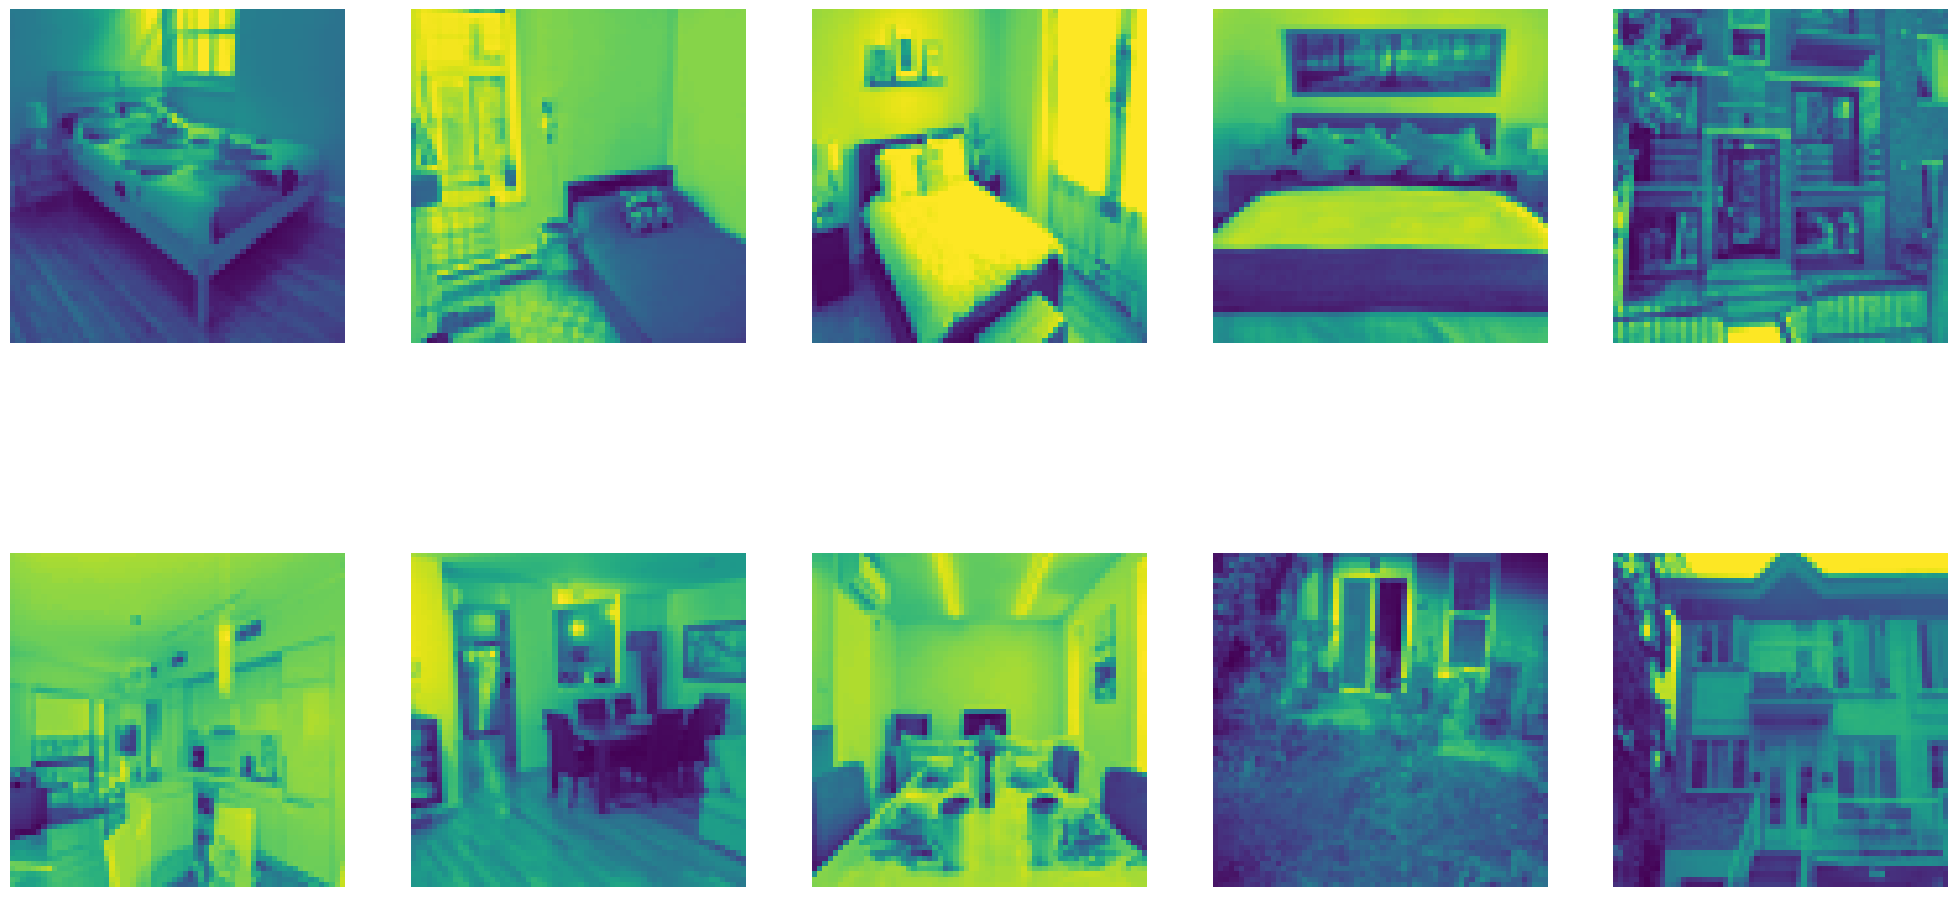

In [ ]:
# checking load_image function and display some of the test images
plt.figure(figsize=(25,20))
for n , i in enumerate(list(np.random.randint(0,len(df_test_image),10))) : 
    plt.subplot(3,5,n+1)
    plt.imshow(df_test_image[i, :, :,0])   
    plt.axis('off')

In [ ]:
# loading summary: (force convert some of the non-string cell to string)
df_test_text = df_test['summary'].astype('str')

In [ ]:
#read before any preprocessing
df_test_text 

0       Charming warm house is ready to host you here ...
1       La chambre est spacieuse et lumineuse, dans un...
2       Grande chambre confortable située au sous-sol ...
3       Près d’un Métro, ligne orange. 10 minutes à pi...
4       Very bright appartment and very cosy. 2 separa...
                              ...                        
7355    Large, fully-furnished flat with brick walls a...
7356    Logement situé dans le haut d’un duplex. Vivez...
7357    My place is close to parks, . My place is good...
7358    *** For security reasons, I will prioritize gu...
7359    Stay in an amazing area of Montreal! 5-7 min f...
Name: summary, Length: 7360, dtype: object

In [ ]:
#apply translate function on the text of the test
df_test_text = df_test['summary'].apply(translate)

In [ ]:
#read after translation
df_test_text 

0       Charming warm house is ready to host you here ...
1       (T, h, e,  , r, o, o, m,  , i, s,  , s, p, a, ...
2       (L, a, r, g, e,  , c, o, m, f, o, r, t, a, b, ...
3       (N, e, a, r,  , a,  , m, e, t, r, o, ,,  , O, ...
4       Very bright appartment and very cosy. 2 separa...
                              ...                        
7355    Large, fully-furnished flat with brick walls a...
7356    (A, c, c, o, m, m, o, d, a, t, i, o, n,  , l, ...
7357    My place is close to parks, . My place is good...
7358    *** For security reasons, I will prioritize gu...
7359    Stay in an amazing area of Montreal! 5-7 min f...
Name: summary, Length: 7360, dtype: object

In [ ]:
#apply clean function on text of the test
df_test_text = df_test_text.astype('str').apply(text_clean)

In [ ]:
#read after cleaning
df_test_text 

0       charming warm house is ready to host you here ...
1       the room is spacious and bright , in an apartm...
2       large comfortable room located in the basement...
3       near metro , orange line . minutes walking . a...
4       very bright appartment and very cosy . separat...
                              ...                        
7355    large , fully furnished flat with brick walls ...
7356    accommodation located at the top of duplex . l...
7357    my place is close to parks , . my place is goo...
7358    for security reasons , will prioritize guests ...
7359    stay in an amazing area of montreal ! min from...
Name: summary, Length: 7360, dtype: object

In [ ]:
df_test_text = _preprocess(df_test_text.astype('str'))

In [ ]:
# prediction on the test set
y_predict = model_1.predict(
    {
        'summary': df_test_text,
        'image': df_test_image
    }
)


# pridect probabilities
price_predicted = y_predict['price']  

# predict categories
price_category_predicted = np.argmax(price_predicted, axis=1)
print(price_category_predicted)

230/230 [==============================] - 1s 2ms/step
[0 0 0 ... 0 0 0]


In [ ]:
# generate a predicted file for first trial
pd.DataFrame(
    {'id': df_test['id'],
     'price': price_category_predicted}
).to_csv('submission_trail_one.csv', index=False)

**observations**

in this trail I used multi model multi objective to predict price and type  
we have two input one is text and another is image 
in text part i used empedding layer to train text input 
and i took average for this layer then we have input image,i used conv2d as first layer then dropout. in addition maxpolling is second and third layer then make flatten the output predict multilabel so two dense layers was used with 
activation function softmax 


Dropout layer is a computationally cheap way to regularize a deep neural network. we can reduce the risk of overfitting and improve the generalization performance of our neural network.

the public score : 0.68179

it was the best

#second_trial

In [ ]:
# here we have two inputs. one for image and the other for text.
in_text = keras.Input(batch_shape=(None, max_len))
in_image = keras.Input(batch_shape=(None, 64, 64, 2))

# text part
embedded = keras.layers.Embedding(tokenizer.num_words, 100)(in_text)
averaged = tf.reduce_mean(embedded, axis=1)


# image part 
cov1 =layers.Conv2D(15, 15 ,activation='relu')(in_image)
cov2 =layers.Conv2D(10, 10,activation='relu')(cov1)
cov3=layers.Conv2D(15, 15,activation='relu')(cov2)
pl = MaxPool2D((3, 3))(cov3)
flattened = Flatten()(pl)

# combine the two inputs
fused = tf.concat([averaged, flattened], axis=-1)

# one dense layer for each task
p_type = Dense(len_type, activation='softmax', name='type')(fused)
p_price = Dense(len_price, activation='softmax', name='price')(fused)


# define model input/output using keys.
model_2 = keras.Model(
    inputs={
        'summary': in_text,
        'image': in_image
    },
    outputs={
        'type': p_type,
        'price': p_price,
    },
)

In [ ]:
# compile model 
model_2.compile(
    optimizer=Adam(0.001),
    loss={
        'type': 'sparse_categorical_crossentropy',
        'price': 'sparse_categorical_crossentropy',
    },
    loss_weights={
        'type': .2,
        'price': .8,       
    },
    metrics={
        'type': ['SparseCategoricalAccuracy'],
        'price': ['SparseCategoricalAccuracy'],
    },
)

In [ ]:
model_2.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None, 64, 64, 2)]  0           []                               
                                                                                                  
 conv2d_2 (Conv2D)              (None, 50, 50, 15)   6765        ['input_6[0][0]']                
                                                                                                  
 conv2d_3 (Conv2D)              (None, 41, 41, 10)   15010       ['conv2d_2[0][0]']               
                                                                                                  
 input_5 (InputLayer)           [(None, 100)]        0           []                               
                                                                                            

In [ ]:
#train the model on the train dataset
history = model_2.fit(
    x={
        'summary': df_train_text_id,
        'image': df_train_image
    },
    y={
        'type': y_train_type,
        'price': y_train_price,
    },
    epochs=8,
    batch_size=27,
    validation_split=0.2,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(monitor='val_price_loss', patience=10, )
    ],
    verbose=1
)
    

Epoch 1/8
218/218 [==============================] - 26s 109ms/step - loss: 1.4881 - price_loss: 1.3175 - type_loss: 2.1704 - price_sparse_categorical_accuracy: 0.6046 - type_sparse_categorical_accuracy: 0.7406 - val_loss: 0.8461 - val_price_loss: 0.8173 - val_type_loss: 0.9615 - val_price_sparse_categorical_accuracy: 0.6241 - val_type_sparse_categorical_accuracy: 0.7688
Epoch 2/8
218/218 [==============================] - 9s 43ms/step - loss: 0.8531 - price_loss: 0.8170 - type_loss: 0.9978 - price_sparse_categorical_accuracy: 0.6196 - type_sparse_categorical_accuracy: 0.7560 - val_loss: 0.8294 - val_price_loss: 0.7997 - val_type_loss: 0.9482 - val_price_sparse_categorical_accuracy: 0.6241 - val_type_sparse_categorical_accuracy: 0.7688
Epoch 3/8
218/218 [==============================] - 6s 25ms/step - loss: 0.8274 - price_loss: 0.7881 - type_loss: 0.9845 - price_sparse_categorical_accuracy: 0.6263 - type_sparse_categorical_accuracy: 0.7560 - val_loss: 0.8019 - val_price_loss: 0.7680 -

In [ ]:
# prediction on the test set
y_predict = model_2.predict(
    {
        'summary': df_test_text,
        'image': df_test_image
    }
)

# pridect probabilities
price_predicted = y_predict['price']  

# predict categories
price_category_predicted = np.argmax(price_predicted, axis=1)
print(price_category_predicted)

230/230 [==============================] - 1s 3ms/step
[0 0 0 ... 0 0 0]


In [ ]:
# generate a predicted file for the second trial
pd.DataFrame(
    {'id': df_test['id'],
     'price': price_category_predicted}
).to_csv('submission_trail_two.csv', index=False)

**observations**

in this trail I used multi model multi objective to predict price and type  
we have two input one is text and another is image 
in text part i used empedding layer to train text input 
and i took average for this layer as the previous trial then we have input image,i used conv2d layers without dropout. in addition maxpolling 


this trial performed less than the previous model because it does not have dropout layers

the public score : 0.675


#third_trial

In [ ]:
# here we have two inputs. one for image and the other for text.
in_text = keras.Input(batch_shape=(None, max_len))  
in_image = keras.Input(batch_shape=(None, 64, 64, 2)) 

# text part
embedded = keras.layers.Embedding(tokenizer.num_words, 100)(in_text) 
averaged = tf.reduce_mean(embedded, axis=1) 

# image part 
cov1 = Conv2D(16, 16, padding='same', activation='relu')(in_image)  
max1=MaxPooling2D()(cov1)
cov2 = Conv2D(16, 16, padding='same', activation='relu')(max1)  
max2=MaxPooling2D()(cov2)
conv3=Conv2D(64, 64, padding='same', activation='relu')(max2)
max3=MaxPooling2D()(conv3)
flattened = Flatten() (max3) 

# concatenate text features with images
fused = tf.concat([averaged, flattened], axis=-1)

# one dense layer for each task
p_type = Dense(len_type, activation='softmax', name='type')(fused)
p_price = Dense(len_price, activation='softmax', name='price')(fused)


# define model input/output using keys.
model_3 = keras.Model(
    inputs={
        'summary': in_text,
        'image': in_image
    },
    outputs={
        'type': p_type,  
        'price': p_price 
    }
)

In [ ]:
# compile model .
model_3.compile(
    optimizer= Adam(.001), 


    loss={
        'type': 'sparse_categorical_crossentropy',
        'price': 'sparse_categorical_crossentropy',
    },
    loss_weights={
        'type': .5,
        'price': .5,       
    },
    metrics={
        'type': ['SparseCategoricalAccuracy'],
        'price': ['SparseCategoricalAccuracy'],
    },
)


In [ ]:
model_3.summary()

Model: "model_8"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_37 (InputLayer)          [(None, 64, 64, 2)]  0           []                               
                                                                                                  
 conv2d_17 (Conv2D)             (None, 64, 64, 16)   8208        ['input_37[0][0]']               
                                                                                                  
 max_pooling2d_5 (MaxPooling2D)  (None, 32, 32, 16)  0           ['conv2d_17[0][0]']              
                                                                                                  
 conv2d_18 (Conv2D)             (None, 32, 32, 16)   65552       ['max_pooling2d_5[0][0]']        
                                                                                            

In [ ]:
#train the model on the train data
history = model_3.fit(
    x={
        'summary': df_train_text_id,
        'image': df_train_image
    },
    y={
        'type': y_train_type,
        'price': y_train_price,
    },
    epochs=8,
    batch_size=32,
    validation_split=0.2,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(monitor='val_price_loss', patience=6, )
    ],
    verbose=1
)

Epoch 1/8
184/184 [==============================] - 20s 105ms/step - loss: 0.5753 - price_loss: 0.5753 - type_loss: 3.1481 - price_sparse_categorical_accuracy: 0.7609 - type_sparse_categorical_accuracy: 0.7253 - val_loss: 0.6896 - val_price_loss: 0.6896 - val_type_loss: 3.1489 - val_price_sparse_categorical_accuracy: 0.6937 - val_type_sparse_categorical_accuracy: 0.7510
Epoch 2/8
184/184 [==============================] - 13s 70ms/step - loss: 0.5568 - price_loss: 0.5568 - type_loss: 3.1503 - price_sparse_categorical_accuracy: 0.7693 - type_sparse_categorical_accuracy: 0.7319 - val_loss: 0.6923 - val_price_loss: 0.6923 - val_type_loss: 3.1496 - val_price_sparse_categorical_accuracy: 0.6917 - val_type_sparse_categorical_accuracy: 0.7497
Epoch 3/8
184/184 [==============================] - 10s 53ms/step - loss: 0.5373 - price_loss: 0.5373 - type_loss: 3.1520 - price_sparse_categorical_accuracy: 0.7776 - type_sparse_categorical_accuracy: 0.7346 - val_loss: 0.6953 - val_price_loss: 0.6953

In [ ]:
# prediction on the test set
y_predict = model_3.predict(
    {
        'summary': df_test_text,
        'image': df_test_image
    }
)


# pridect probabilities
price_predicted = y_predict['price']  

# predict categories
price_category_predicted = np.argmax(price_predicted, axis=1)
print(price_category_predicted)

230/230 [==============================] - 1s 6ms/step
[0 0 0 ... 0 0 0]


In [ ]:
# generate a predicted file third trial
pd.DataFrame(
    {'id': df_test['id'],
     'price': price_category_predicted}
).to_csv('submission_trail_three.csv', index=False)

**observations** 

in this trial i used maxpoolinf layers and padding during build my CNN architecture 

max pooling to downsample the generated feature matrix befor flatten and dense layer to reduce complexity of the model and avoid overfitting

padding to get the same image size after convolutional operation in CNN


this trial slightly performed better than the previos trial 

the puplic score: .67798

#fourth_trial

In [ ]:
# here we have two inputs. one for image and the other for text.
in_text = keras.Input(batch_shape=(None, max_len))
in_image = keras.Input(batch_shape=(None, 64, 64, 2))

# text part
embedded = keras.layers.Embedding(tokenizer.num_words, 100)(in_text)
gru =keras.layers.GRU(4)(embedded)

# image part 
cov1 = Conv2D(10, (15,15) , activation='relu')(in_image) 
pl = MaxPool2D((5, 5))(cov1)
flattened = Flatten()(pl)
# conatenate the two inputs
fused = tf.concat([gru, flattened], axis=-1)

# one dense layer for each task
p_type = Dense(len_type, activation='softmax', name='type')(fused)
p_price = Dense(len_price, activation='softmax', name='price')(fused)


# define model input/output using keys.
model_4= keras.Model(
    inputs={
        'summary': in_text,
        'image': in_image
    },
    outputs={
        'type': p_type,
        'price': p_price,
    },
)

In [ ]:
# compile model 
model_4.compile(
    optimizer=Adam(),
    loss={
        'type': 'sparse_categorical_crossentropy',
        'price': 'sparse_categorical_crossentropy',
    },
    loss_weights={
        'type': .3,
        'price': .7,       
    },
    metrics={
        'type': ['SparseCategoricalAccuracy'],
        'price': ['SparseCategoricalAccuracy'],
    },
)

In [ ]:
model_4.summary()

Model: "model_9"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_39 (InputLayer)          [(None, 64, 64, 2)]  0           []                               
                                                                                                  
 input_38 (InputLayer)          [(None, 100)]        0           []                               
                                                                                                  
 conv2d_20 (Conv2D)             (None, 50, 50, 10)   4510        ['input_39[0][0]']               
                                                                                                  
 embedding_14 (Embedding)       (None, 100, 100)     60000000    ['input_38[0][0]']               
                                                                                            

In [ ]:
#train model on the train data
history = model_4.fit(
    x={
        'summary': df_train_text_id,
        'image': df_train_image
    },
    y={
        'type': y_train_type,
        'price': y_train_price,
    },
    epochs=8,
    batch_size=32,
    validation_split=0.2,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(monitor='val_price_loss', patience=6, )
    ],
    verbose=1
)

Epoch 1/8
184/184 [==============================] - 19s 82ms/step - loss: 5.2938 - price_loss: 5.2938 - type_loss: 25.5419 - price_sparse_categorical_accuracy: 0.6038 - type_sparse_categorical_accuracy: 0.0138 - val_loss: 0.8472 - val_price_loss: 0.8472 - val_type_loss: 3.1788 - val_price_sparse_categorical_accuracy: 0.6241 - val_type_sparse_categorical_accuracy: 0.0000e+00
Epoch 2/8
184/184 [==============================] - 7s 36ms/step - loss: 0.8437 - price_loss: 0.8437 - type_loss: 3.1799 - price_sparse_categorical_accuracy: 0.6196 - type_sparse_categorical_accuracy: 1.7065e-04 - val_loss: 0.8305 - val_price_loss: 0.8305 - val_type_loss: 3.1790 - val_price_sparse_categorical_accuracy: 0.6241 - val_type_sparse_categorical_accuracy: 0.0000e+00
Epoch 3/8
184/184 [==============================] - 5s 28ms/step - loss: 0.8378 - price_loss: 0.8378 - type_loss: 3.1800 - price_sparse_categorical_accuracy: 0.6196 - type_sparse_categorical_accuracy: 3.4130e-04 - val_loss: 0.8285 - val_pric

In [ ]:
# prediction on the test set
y_predict = model_4.predict(
    {
        'summary': df_test_text,
        'image': df_test_image
    }
)


# pridect probabilities
price_predicted = y_predict['price']  

# predict categories
price_category_predicted = np.argmax(price_predicted, axis=1)
print(price_category_predicted)

230/230 [==============================] - 1s 4ms/step
[0 0 0 ... 0 0 0]


In [ ]:
# generate a file for the fourth trial
pd.DataFrame(
    {'id': df_test['id'],
     'price': price_category_predicted}
).to_csv('submission_trail_four.csv', index=False)

observations

in this trial i used GRU layer for text input and con2D, maxpool for input image

Gated Recurrent Unit(gru): this layer is a simple fully connected layer with Gated recurrent units instead of simple neurons. Gated recurrent Based on available runtime hardware and constraints, this layer will choose different implementations(cuDNN-based or pure-TensorFlow) to maximize the performance.

puplic score: .6201



#fifth_trial (bonus)

In [ ]:
# here we have two inputs. one for image and the other for text.
in_text = keras.Input(batch_shape=(None, max_len))
in_image = keras.Input(batch_shape=(None, 64, 64, 2))

# text part
embedded = keras.layers.Embedding(tokenizer.num_words, 100)(in_text)
averaged = tf.reduce_mean(embedded, axis=1)


# image part 
cov1 = Conv2D(10,(14,14), activation='softmax')(in_image) # 10 number of filters  and  (15, 15) size of filter
vgg=VGG19(weights=None, input_shape=( 51, 51, 10), include_top=False)(cov1)
flattened= Flatten()(vgg)

# combine the two inputs
fused = tf.concat([averaged, flattened], axis=-1)

# one dense layer for each task
p_type = Dense(len_type, activation='softmax', name='type')(fused)
p_price = Dense(len_price, activation='softmax', name='price')(fused)


# define model input/output using keys.
model_5= keras.Model(
    inputs={
        'summary': in_text,
        'image': in_image
    },
    outputs={
        'type': p_type,
        'price': p_price,
    },
)

In [ ]:
# compile model 
model_5.compile(
    optimizer=Adam(),
    loss={
        'type': 'sparse_categorical_crossentropy',
        'price': 'sparse_categorical_crossentropy',
    },
    loss_weights={
        'type': .5,
        'price': .5,       
    },
    metrics={
        'type': ['SparseCategoricalAccuracy'],
        'price': ['SparseCategoricalAccuracy'],
    },
)

In [ ]:
model_5.summary()

Model: "model_13"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_49 (InputLayer)          [(None, 64, 64, 2)]  0           []                               
                                                                                                  
 input_48 (InputLayer)          [(None, 100)]        0           []                               
                                                                                                  
 conv2d_24 (Conv2D)             (None, 51, 51, 10)   3930        ['input_49[0][0]']               
                                                                                                  
 embedding_18 (Embedding)       (None, 100, 100)     60000000    ['input_48[0][0]']               
                                                                                           

In [ ]:
# train model on the train data
history = model_5.fit(
    x={
        'summary': df_train_text_id,
        'image': df_train_image
    },
    y={
        'type': y_train_type,
        'price': y_train_price,
    },
    epochs=8,
    batch_size=32,
    validation_split=0.2,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(monitor='val_price_loss', patience=6, )
    ],
    verbose=1
)

Epoch 1/8
184/184 [==============================] - 25s 107ms/step - loss: 1.8232 - price_loss: 1.7423 - type_loss: 1.9042 - price_sparse_categorical_accuracy: 0.5971 - type_sparse_categorical_accuracy: 0.7510 - val_loss: 0.8929 - val_price_loss: 0.8254 - val_type_loss: 0.9603 - val_price_sparse_categorical_accuracy: 0.6241 - val_type_sparse_categorical_accuracy: 0.7688
Epoch 2/8
184/184 [==============================] - 12s 65ms/step - loss: 0.9093 - price_loss: 0.8153 - type_loss: 1.0033 - price_sparse_categorical_accuracy: 0.6225 - type_sparse_categorical_accuracy: 0.7560 - val_loss: 0.8663 - val_price_loss: 0.7861 - val_type_loss: 0.9466 - val_price_sparse_categorical_accuracy: 0.6364 - val_type_sparse_categorical_accuracy: 0.7688
Epoch 3/8
184/184 [==============================] - 10s 52ms/step - loss: 0.8708 - price_loss: 0.7654 - type_loss: 0.9762 - price_sparse_categorical_accuracy: 0.6517 - type_sparse_categorical_accuracy: 0.7560 - val_loss: 0.8311 - val_price_loss: 0.7490

In [ ]:
# prediction on the test set
y_predict = model_5.predict(
    {
        'summary': df_test_text,
        'image': df_test_image
    }
)


# pridect probabilities
price_predicted = y_predict['price']  

# predict categories
price_category_predicted = np.argmax(price_predicted, axis=1)
print(price_category_predicted)

230/230 [==============================] - 2s 10ms/step
[0 0 0 ... 0 0 0]


In [ ]:
# generate a file for the fifth trial
pd.DataFrame(
    {'id': df_test['id'],
     'price': price_category_predicted}
).to_csv('submission_trail_five.csv', index=False)

**observations**

in this trial i used tranfer learning model vgg19 for input images but i did not freez the weights i used them as a initial values while updating because vgg19 weights were updated on imagenet dataset and this problem consider out of domain so i decied to retrain the model againt to optimize the weights 

the puplic score: .6799

#sixth_trial

In [ ]:
# here we have two inputs. one for image and the other for text.
in_text = keras.Input(batch_shape=(None, max_len))
in_image = keras.Input(batch_shape=(None, 64, 64, 2))

# text part
embedded = keras.layers.Embedding(tokenizer.num_words, 100)(in_text)
lstm = tf.keras.layers.LSTM(4)(embedded)


# image part 
cov1 = Conv2D(32, (16, 16))(in_image) 
con_drop = Dropout(0.2)(cov1)
pl = MaxPool2D((5, 5))(con_drop)
flattened = Flatten()(pl)

# cobine the two inputs
fused = tf.concat([lstm, flattened], axis=-1)

# one dense layer for each task
p_type = Dense(len_type, activation='softmax', name='type')(fused)
p_price = Dense(len_price, activation='softmax', name='price')(fused)


# define model input/output using keys.
model_6 = keras.Model(
    inputs={
        'summary': in_text,
        'image': in_image
    },
    outputs={
        'type': p_type,
        'price': p_price,
    },
)

In [ ]:
# compile the model 
model_6.compile(
    optimizer=Adam(),
    loss={
        'type': 'sparse_categorical_crossentropy',
        'price': 'sparse_categorical_crossentropy',
    },
    loss_weights={
        'type': .5,
        'price': .5,       
    },
    metrics={
        'type': ['SparseCategoricalAccuracy'],
        'price': ['SparseCategoricalAccuracy'],
    },
)

In [ ]:
model_6.summary()

Model: "model_15"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_54 (InputLayer)          [(None, 64, 64, 2)]  0           []                               
                                                                                                  
 conv2d_26 (Conv2D)             (None, 49, 49, 32)   16416       ['input_54[0][0]']               
                                                                                                  
 input_53 (InputLayer)          [(None, 100)]        0           []                               
                                                                                                  
 dropout_3 (Dropout)            (None, 49, 49, 32)   0           ['conv2d_26[0][0]']              
                                                                                           

In [ ]:
# train model on the train data
history = model_6.fit(
    x={
        'summary': df_train_text_id,
        'image': df_train_image
    },
    y={
        'type': y_train_type,
        'price': y_train_price,
    },
    epochs=8,
    batch_size=32,
    validation_split=0.2,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(monitor='val_price_loss', patience=6, )
    ],
    verbose=1
)

Epoch 1/8


2023-04-14 00:53:21.429731: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inmodel_15/dropout_3/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


184/184 [==============================] - 18s 84ms/step - loss: 21.6701 - price_loss: 18.0055 - type_loss: 25.3348 - price_sparse_categorical_accuracy: 0.4875 - type_sparse_categorical_accuracy: 0.5517 - val_loss: 556.2140 - val_price_loss: 153.0490 - val_type_loss: 959.3792 - val_price_sparse_categorical_accuracy: 0.6241 - val_type_sparse_categorical_accuracy: 6.8213e-04
Epoch 2/8
184/184 [==============================] - 6s 34ms/step - loss: 10.7061 - price_loss: 8.4712 - type_loss: 12.9409 - price_sparse_categorical_accuracy: 0.4981 - type_sparse_categorical_accuracy: 0.5614 - val_loss: 1419.6868 - val_price_loss: 521.3991 - val_type_loss: 2317.9749 - val_price_sparse_categorical_accuracy: 0.3145 - val_type_sparse_categorical_accuracy: 0.0000e+00
Epoch 3/8
184/184 [==============================] - 5s 30ms/step - loss: 18.6341 - price_loss: 13.8469 - type_loss: 23.4213 - price_sparse_categorical_accuracy: 0.4814 - type_sparse_categorical_accuracy: 0.5669 - val_loss: 1253.4644 - va

In [ ]:
# prediction on the test set
y_predict = model_6.predict(
    {
        'summary': df_test_text,
        'image': df_test_image
    }
)


# pridect probabilities
price_predicted = y_predict['price']  

# predict categories
price_category_predicted = np.argmax(price_predicted, axis=1)
print(price_category_predicted)

230/230 [==============================] - 1s 4ms/step
[0 0 0 ... 0 0 0]


In [ ]:
# generate a file for the last trial
pd.DataFrame(
    {'id': df_test['id'],
     'price': price_category_predicted}
).to_csv('submission_trail_six.csv', index=False)

**observations**

in this trial i used LSTM layer to input text

LSTM stands for Long Short-Term Memory and is a type of recurrent neural network (RNN) architecture used for sequence modeling and prediction tasks. and designed to avoid the long-term dependency problem.

the puplic score: .6407